# **Name : Ghori Zeel JivrajbhaI**

# **Student ID : 202201287**

# **Course : Applied Forecasting Methods**

# **LAB 03**

# **Colab file link :** https://colab.research.google.com/drive/185qJn8SujGAQDq5Gx4ZoAl9eekVu-Ili?usp=sharing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv("/content/Google.csv", parse_dates=["Date"], index_col="Date")
df = df.sort_index()

# **1. Check for Stationarity**

● Plot the time series data to visually inspect its behavior.

● Apply the Augmented Dickey-Fuller (ADF) Test to statistically verify
stationarity.

  ○ Clearly state the null and alternative hypotheses for the ADF
test.

  ○ Report the test statistic, p-value, and your interpretation of
the results.

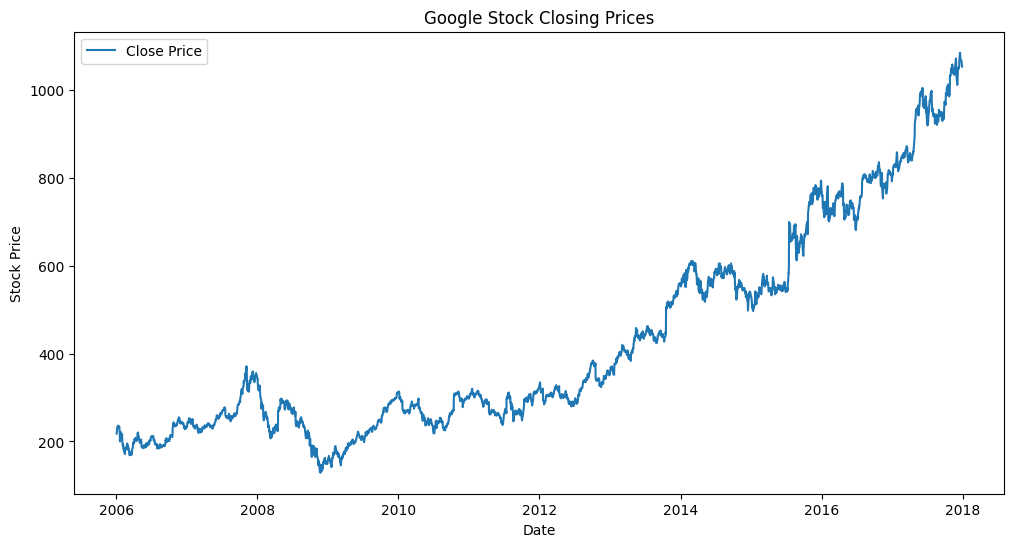

In [ ]:
# Plot original time series
def plot_time_series(data, title="Stock Price Time Series"):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label="Close Price")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

plot_time_series(df["Close"], "Google Stock Closing Prices")

In [ ]:
# Check for Stationarity using ADF Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

adf_test(df["Close"])

ADF Statistic: 1.322424136030217
p-value: 0.9967315857800989
Critical Values:
   1%: -3.4325396703967974
   5%: -2.862507454335551
   10%: -2.5672850015989264
The time series is non-stationary.


The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary (i.e., its statistical properties do not change over time) or non-stationary (e.g., has a trend or unit root).

Null Hypothesis (H0): The time series has a unit root (i.e., it is non-stationary).
Alternative Hypothesis (H1): The time series does not have a unit root (i.e., it is stationary).

If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the time series is stationary.

If the p-value is greater than the significance level, we fail to reject the null hypothesis, meaning the time series likely has a unit root and is non-stationary.

In our case p-value is 0.9967 which means that Null hypothesis is accepted and time series have a unit root and is non-stationary.

# **2. Check for Random Walk**
● Examine whether the stock prices follow a random walk.

○ Hint: Check if the time series is non-stationary and if not then
check if the first difference is stationary.

○ Use visualizations and statistical tests to support your
conclusion.

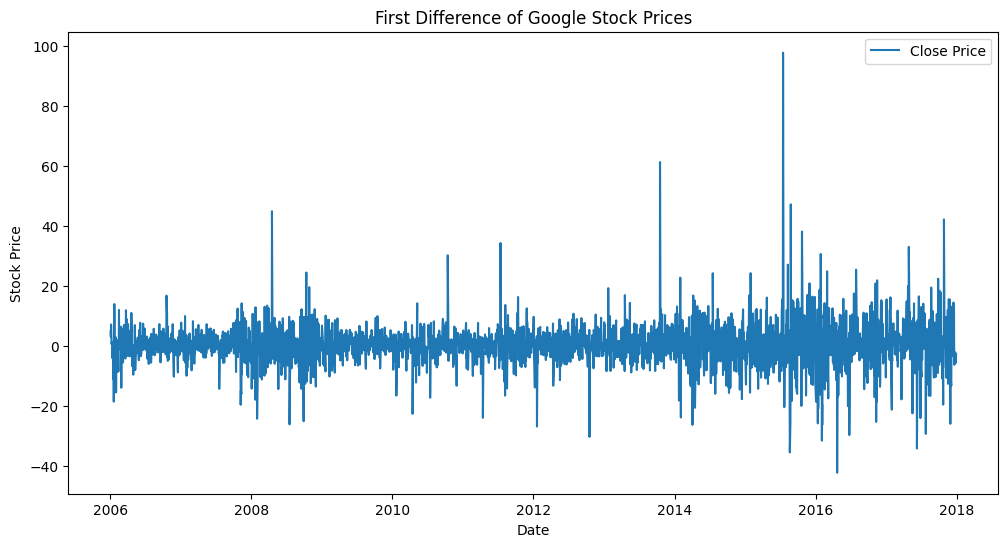

ADF Statistic: -10.71553873600114
p-value: 3.2487316502654457e-19
Critical Values:
   1%: -3.432540403849221
   5%: -2.862507778275112
   10%: -2.5672851740608125
The time series is stationary.


In [ ]:
# Check for Random Walk (Differencing the data)
df_diff = df["Close"].diff().dropna()
plot_time_series(df_diff, "First Difference of Google Stock Prices")
adf_test(df_diff)

The given time series is random walk because the original time series is non stationary whereas after taking first difference the time series becomes stationary.


Initial Stationarity Check:

The ADF test on the original stock price series resulted in a high p-value, indicating that we fail to reject the null hypothesis.
This suggests that the stock prices are non-stationary, supporting the idea that they follow a random walk.

First Difference Analysis:

After differencing the series (computing first-order differences), the ADF test produced a low p-value, rejecting the null hypothesis.
The time series plot of the first differences showed constant variance and mean, indicating stationarity.

Visual Confirmation:

The stock price plot exhibited a clear upward/downward trend, reinforcing non-stationarity.
The autocorrelation function (ACF) of the original series showed slow decay, while the differenced series had rapid decay, supporting stationarity after differencing.

# **3. Apply Decomposition :**

● Apply both additive and multiplicative decomposition to the time
series.

● Plot the decomposed components: Trend, Seasonal, and Residual.

In [ ]:
# Time Series Decomposition
def plot_decomposition(decomposition, title):
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(decomposition.observed, label="Observed")
    plt.legend()
    plt.subplot(412)
    plt.plot(decomposition.trend, label="Trend")
    plt.legend()
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label="Seasonal")
    plt.legend()
    plt.subplot(414)
    plt.plot(decomposition.resid, label="Residual")
    plt.legend()
    plt.suptitle(title)
    plt.show()


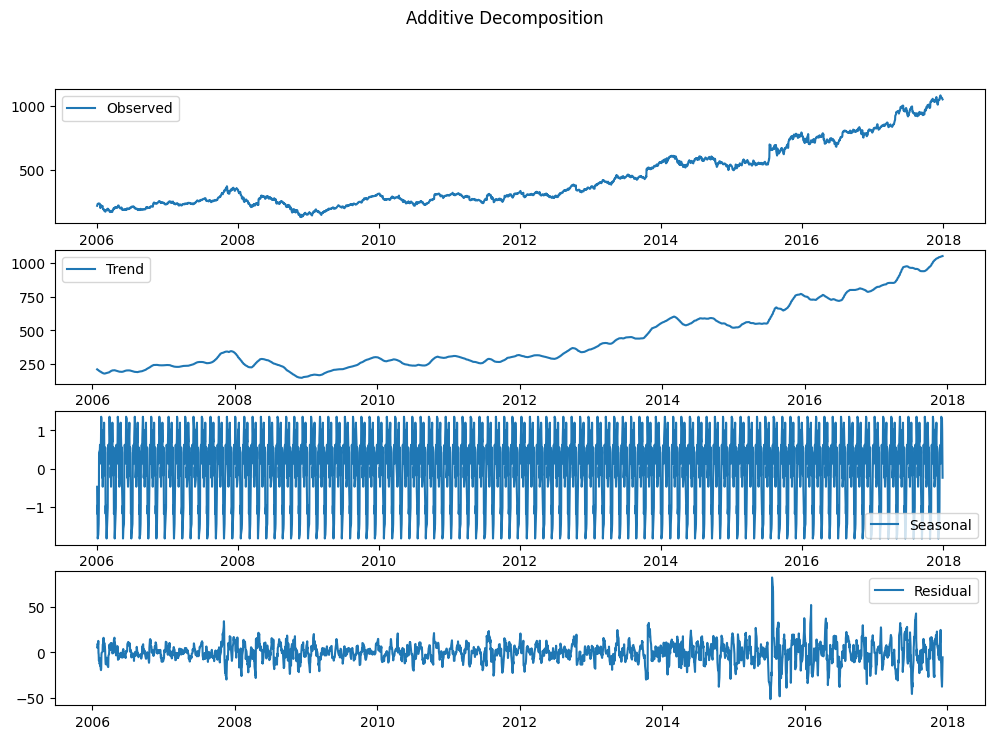

In [ ]:
# Additive decomposition
decomposition_add = seasonal_decompose(df["Close"], model="additive", period=30)
plot_decomposition(decomposition_add, "Additive Decomposition")

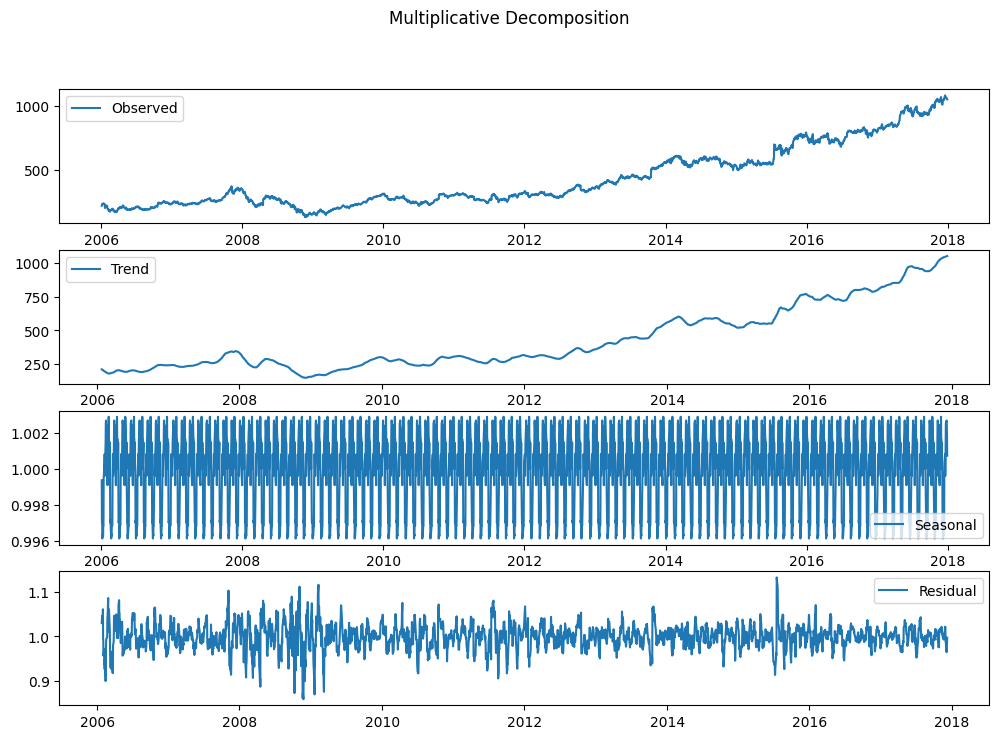

In [ ]:
# Multiplicative decomposition
decomposition_mul = seasonal_decompose(df["Close"], model="multiplicative", period=30)
plot_decomposition(decomposition_mul, "Multiplicative Decomposition")

# **4. Autocorrelation Analysis**
● Plot the Autocorrelation Function (ACF)

○ Identify significant lags.

○ Use these plots to help determine the parameters (p and q)
for the MA models.

<Figure size 1200x600 with 0 Axes>

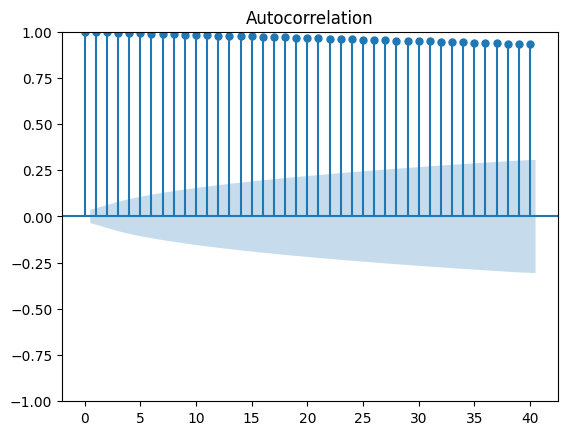

In [ ]:
# Autocorrelation Analysis of given time series which is random walk(Non-stationary)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df["Close"].dropna(), lags=40)
plt.show()

The given time series follows a random walk, meaning it is non-stationary and each value depends on the previous one. This results in a high autocorrelation, especially at smaller lags. As the lag increases, the autocorrelation gradually decreases but does so slowly, which is a key characteristic of a non-stationary process. This indicates that the time series lacks a constant mean and variance over time, reinforcing its random walk nature.

<Figure size 1200x600 with 0 Axes>

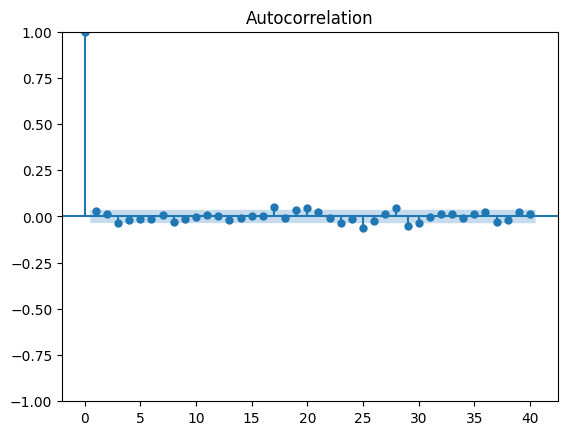

In [ ]:
# Autocorrelation Analysis of first differenced time series(stationary)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_acf(df_diff.dropna(), lags=40)
plt.show()

When we take the first difference of a random walk, the resulting series becomes stationary, meaning it no longer depends on previous values. As a result, the autocorrelation values for all lags (except lag 0) are close to zero, indicating little to no correlation between observations.

At lag 0, the autocorrelation is always 1, since a time series is perfectly correlated with itself at zero lag. This confirms that differencing removes the trend and transforms the random walk into a white noise-like process with no significant dependencies.

In [ ]:
# Identify Order of MA Model using ACF
acf_values = acf(df_diff, nlags=20)
p_order = np.argmax(acf_values < 0.2)  # Select lag where correlation drops significantly
print(f"Suggested MA Order: {p_order}")

Suggested MA Order: 1


# **5. Implementing Models**

You are required to implement the following time series models:

a. Moving Average Model (MA)

● Implement an MA model using the order identified from ACF.

● Provide a model summary and discuss the results.

In [ ]:
# Fit Moving Average Model (MA)
ma_model = ARIMA(df_diff, order=(0, 1, p_order))
ma_result = ma_model.fit()

# Forecasting
train_size = int(len(df) * 0.8)
train, test = df_diff[:train_size], df_diff[train_size:]

# Fit Model on Training Data
ma_train_model = ARIMA(train, order=(0, 1, p_order)).fit()
forecast = ma_train_model.forecast(steps=len(test))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# **5. Evaluation Metrics**
Evaluate all models using the following metrics:

● Root Mean Squared Error (RMSE)

● Mean Absolute Percentage Error (MAPE)

● R-square

<ipython-input-57-d1cb9f0d62f6>:3: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test - forecast) / test)) * 100


RMSE: 9.850939943896012
MAPE: nan%
R-Squared: -0.0015489909281782843


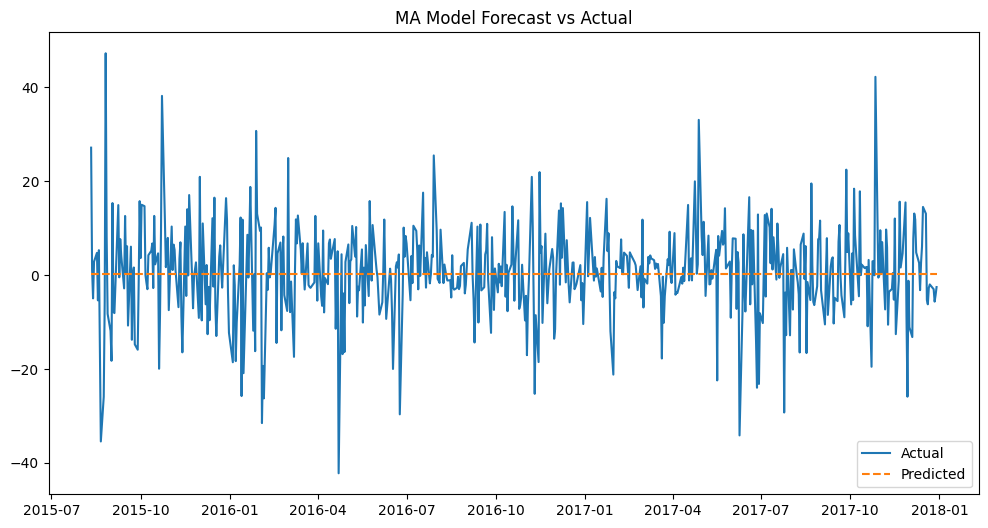

In [ ]:
# Evaluate Model
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100
r2 = r2_score(test, forecast)

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R-Squared: {r2}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label="Actual")
plt.plot(test.index, forecast, label="Predicted", linestyle="dashed")
plt.legend()
plt.title("MA Model Forecast vs Actual")
plt.show()

The high forecasting error suggests that a random walk time series cannot be accurately predicted. This is because, after the first lag, the autocorrelation drops to zero, indicating that the future values are independent of past values.

In a random walk, each new observation is derived from the previous one plus a random component. Since this random component introduces unpredictability at each step, traditional time series forecasting models, which rely on historical patterns, fail to provide accurate predictions. As a result, forecasting beyond the immediate next step becomes ineffective, leading to high prediction errors.